<a href="https://colab.research.google.com/github/AeroEng16/FootballAnalysis/blob/main/lineDetectionAndHomography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [6]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math
import plotly.express as px
import pandas as pd

In [7]:
vid = cv2.VideoCapture("/content/drive/MyDrive/ML/FootballAnalysis/08fd33_4.mp4")

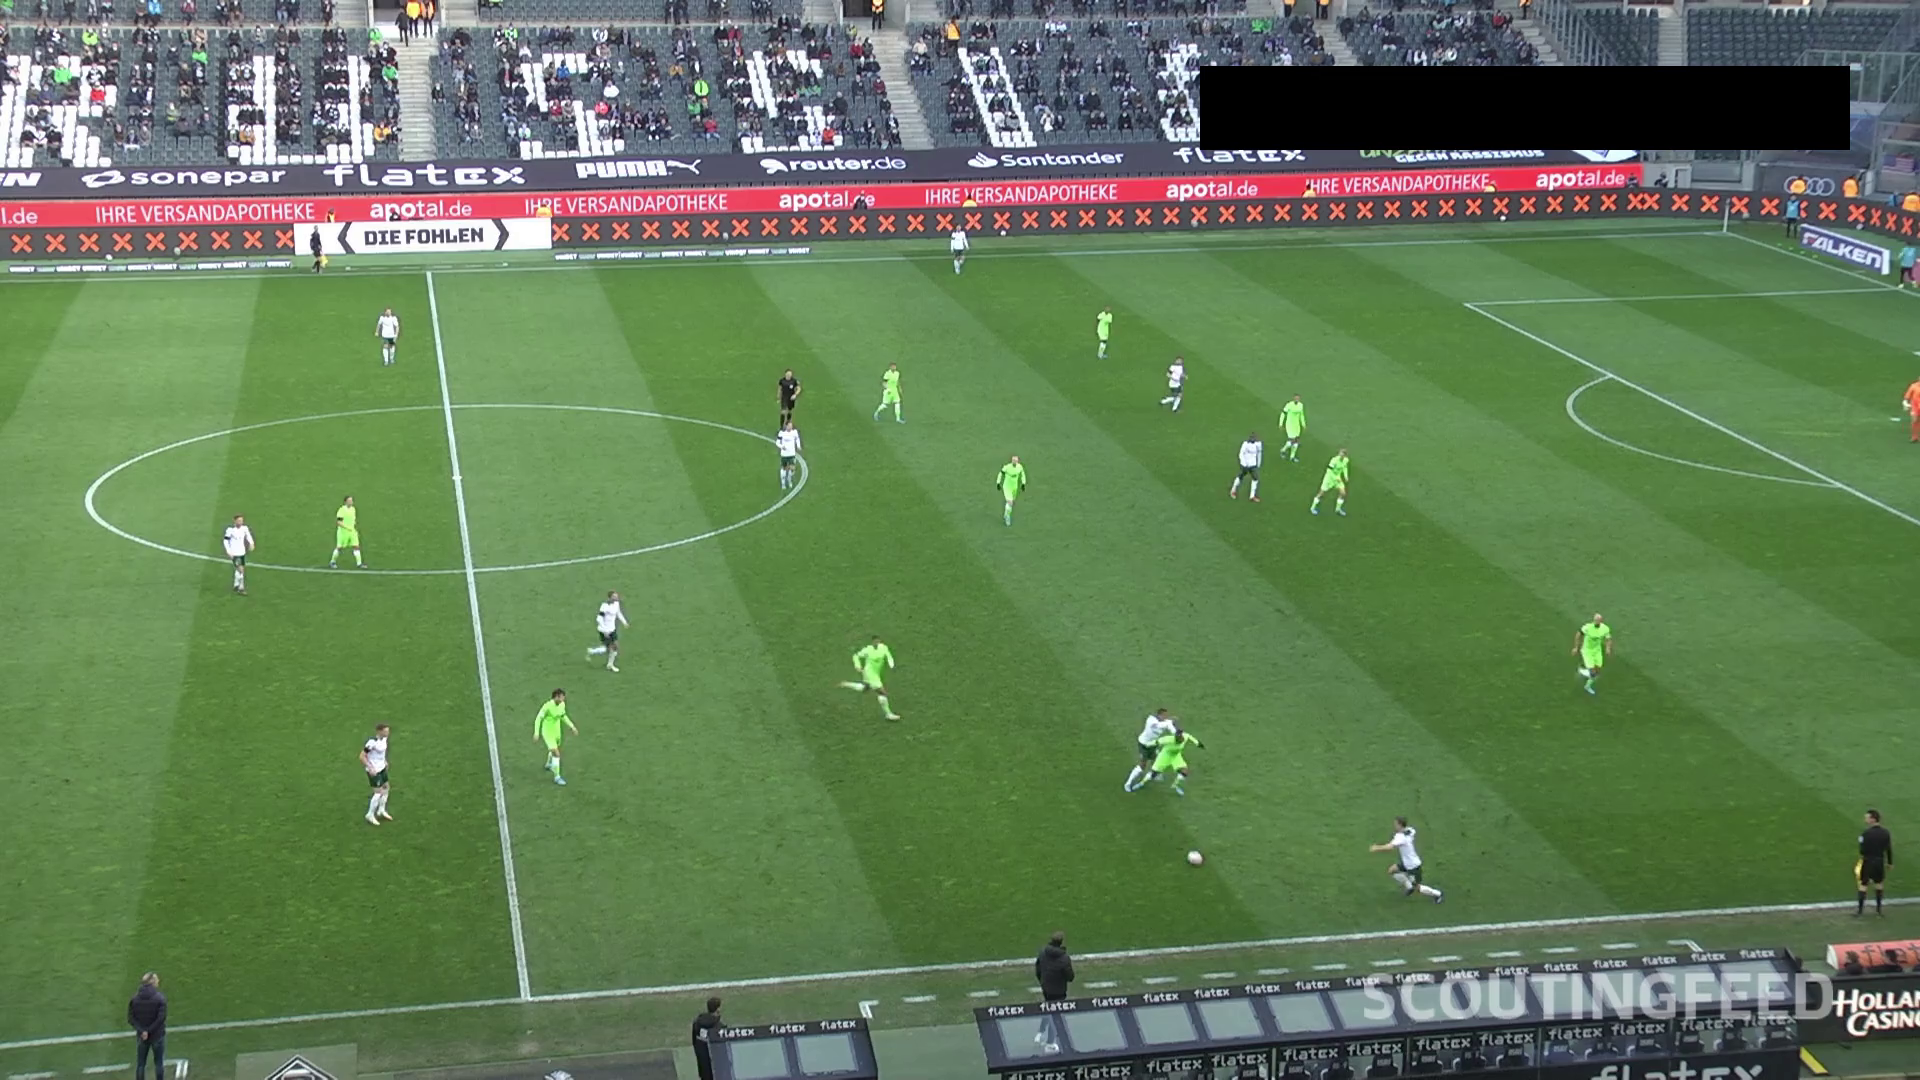

In [24]:
ret, frame = vid.read()

cv2_imshow(frame)

In [9]:
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
mask_green = cv2.inRange(hsv, (36, 25, 25), (86, 255, 255)) # green mask to select only the field
frame_masked = cv2.bitwise_and(frame, frame, mask=mask_green)

gray = cv2.cvtColor(frame_masked, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
lsd=cv2.createLineSegmentDetector(0)
canny = cv2.Canny(gray, 50, 150, apertureSize=3)
# Hough line detection
lines = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, None, 50, 20)
# Line segment detection
lines_lsd = lsd.detect(canny)[0]

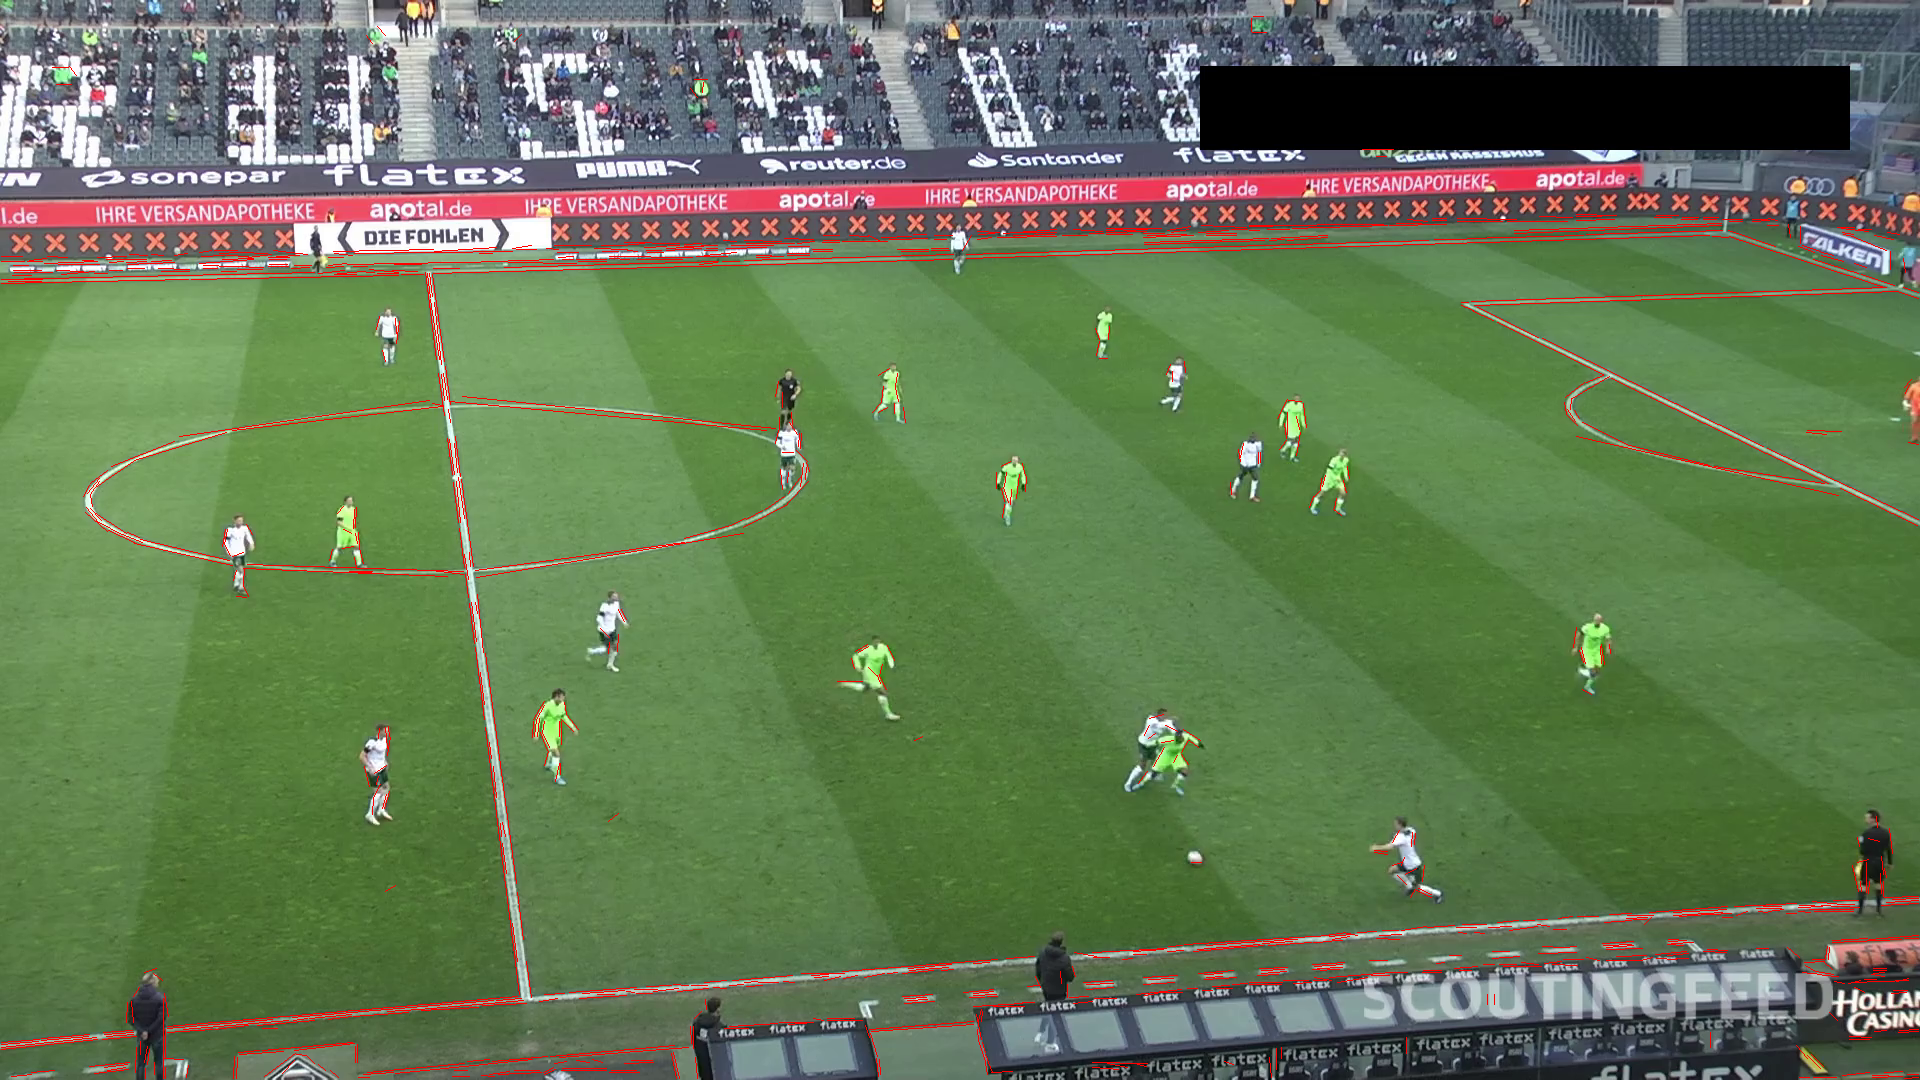

In [10]:
drawn_img = lsd.drawSegments(frame,lines_lsd)
cv2_imshow(drawn_img)

In [11]:
lines_lsd
vectors = []
for line in lines_lsd:

  distance = [line[0][2] - line[0][0], line[0][3] - line[0][1]]

  norm = math.sqrt(distance[0] ** 2 + distance[1] ** 2)
  vectors.append([distance[0] / norm, distance[1] / norm])



In [12]:
df = pd.DataFrame(vectors, columns=['x', 'y'])
df.head()

x         y
0 -0.999921 -0.012574
1  0.999655 -0.026253
2  0.972166  0.234294
3  0.999385  0.035062
4  0.999613 -0.027802

In [25]:
from PIL import Image
im = Image.fromarray(frame)
im.save("test.png")

In [1]:
try:
  import supervision as sv
  from inference import get_model
except ImportError:
  !pip install inference supervision
  import supervision as sv
  from inference import get_model


In [4]:
import supervision as sv
from inference import get_model
import cv2
import numpy as np
model = get_model(
    model_id="football-field-detection-f07vi/14",
    api_key="Sjv2KA46fn0Ksxphg6NV"
)

image = cv2.imread("test.png")
result = model.infer(image, confidence=0.3)[0]

keypoints = sv.KeyPoints.from_inference(result)

filter = keypoints.confidence > 0.5
keypoints.xy = keypoints.xy[filter][np.newaxis]
keypoints.confidence = keypoints.confidence[filter][np.newaxis]

vertex_annotator = sv.VertexAnnotator(radius=12)
annotated_image = vertex_annotator.annotate(image.copy(), keypoints)

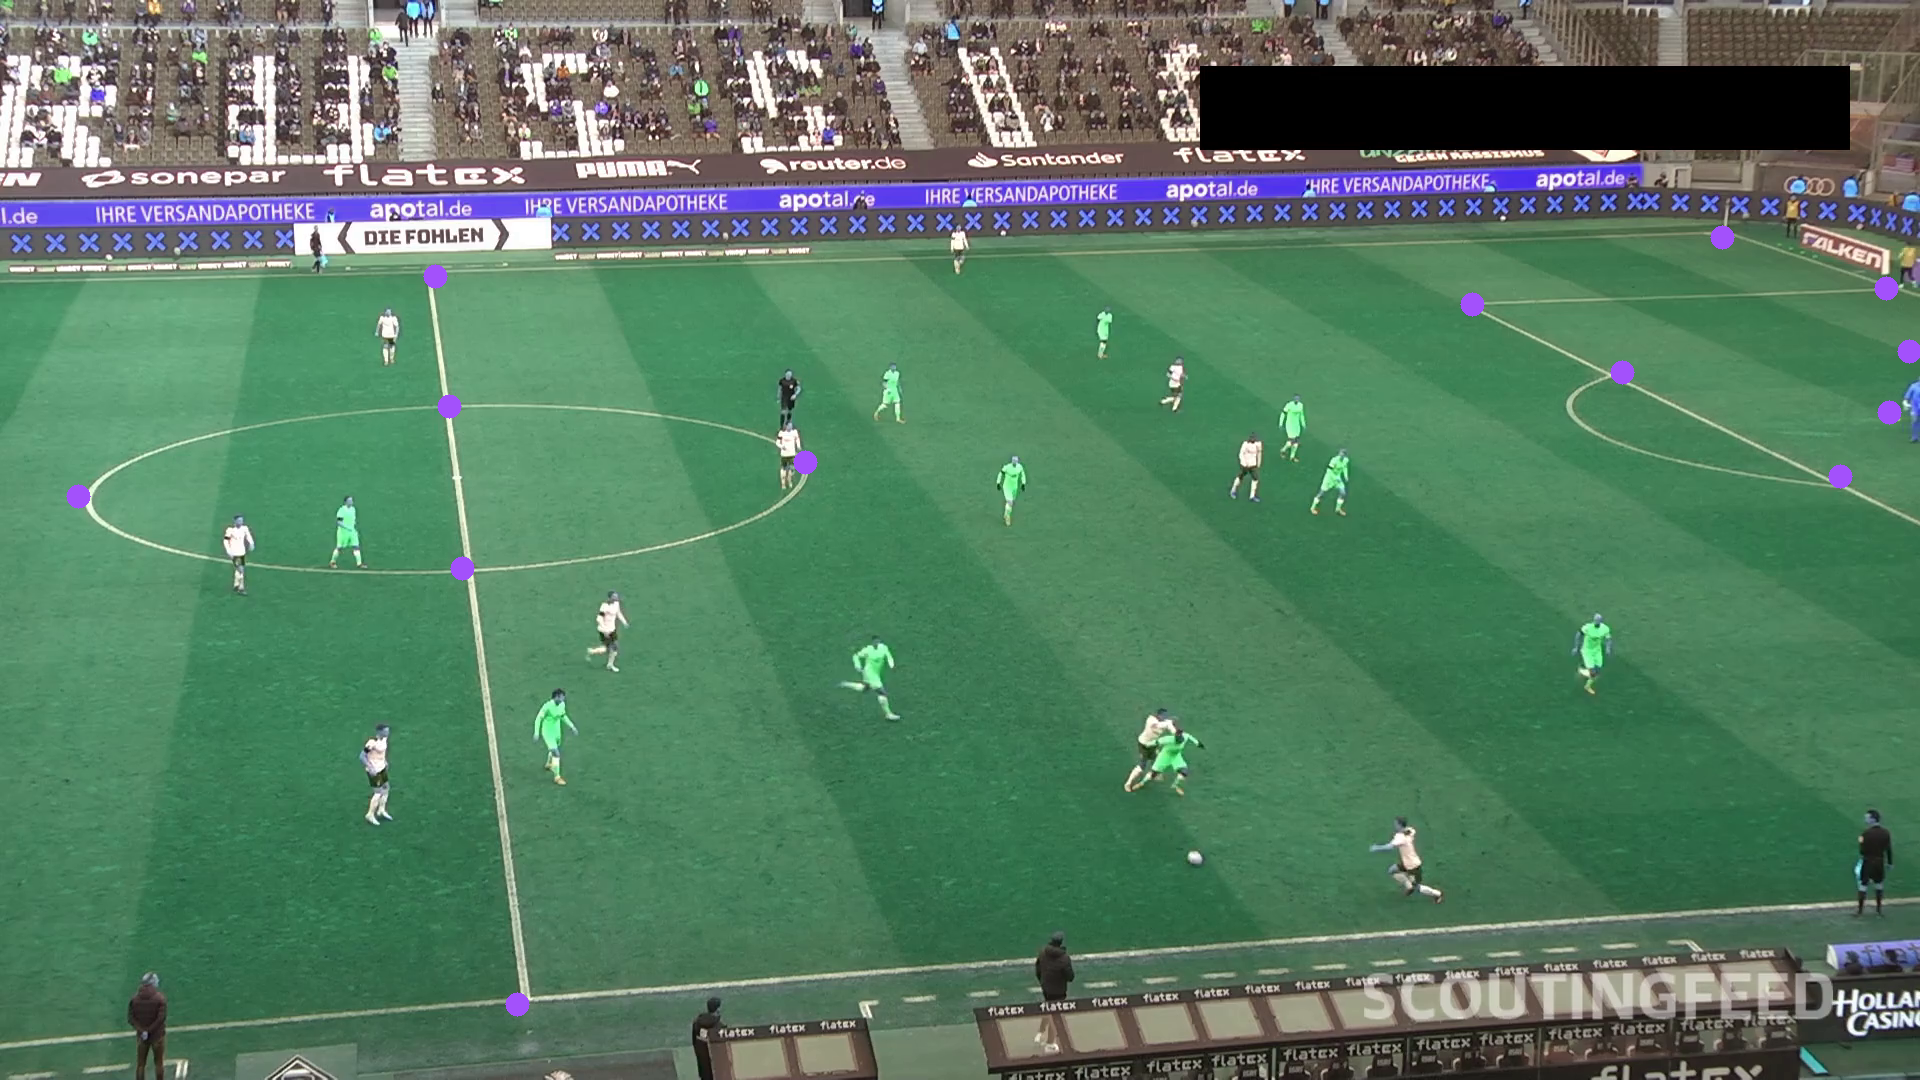

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(annotated_image)